Anomaly Detection with Unsupervised Learning
* https://www.kaggle.com/code/jiedong00/anomaly-detection-with-unsupervised-learning/notebook

## Import

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory = '/content/drive/MyDrive/DACON_신용카드 사기 거래 탐지 AI 경진대회'

In [ ]:
train_df = pd.read_csv(f'{directory}/data/train.csv') # Train
display(train_df.head())

val_df = pd.read_csv(f'{directory}/data/val.csv') # Validation
display(val_df.head())

test_df = pd.read_csv(f'{directory}/data/test.csv') # Validation
display(test_df.head())

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


## EDA
* valid_df 로 eda

In [ ]:
normal = val_df.drop(columns = ['ID']).loc[val_df['Class'] == 0, :]
normal.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,...,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.000000,28432.0
mean,0.011820,-0.003034,0.011758,-0.003865,0.000900,-0.015812,0.013685,0.007648,-0.001409,0.005692,...,0.000826,0.001394,0.001554,0.002346,0.000435,0.000032,-0.000086,0.924202,0.120106,0.0
std,1.903021,1.592242,1.438086,1.390272,1.311665,1.290693,1.101884,1.092214,1.082844,1.037542,...,0.720846,0.587799,0.603244,0.526565,0.484707,0.388780,0.303780,3.348744,0.558146,0.0
min,-29.516123,-38.305310,-14.848123,-5.071241,-21.577019,-16.172614,-16.387147,-26.278007,-4.362249,-11.208723,...,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.0
25%,-0.912467,-0.598848,-0.869950,-0.853099,-0.696877,-0.773740,-0.544826,-0.211022,-0.640844,-0.539103,...,-0.542755,-0.160298,-0.352230,-0.322079,-0.328649,-0.071759,-0.052335,-0.226368,-0.357679,0.0
50%,0.025035,0.074632,0.177232,-0.024081,-0.052735,-0.280286,0.047429,0.022312,-0.065567,-0.098231,...,0.008156,-0.011350,0.040176,0.016615,-0.049773,0.000434,0.012136,0.006218,0.002408,0.0
75%,1.315867,0.801268,1.012016,0.735528,0.598752,0.378145,0.567380,0.323227,0.597233,0.453512,...,0.527964,0.145999,0.441544,0.353035,0.240520,0.088949,0.080736,0.777754,0.641860,0.0
max,2.411769,11.874957,4.226108,9.752791,24.345310,12.128950,26.237722,11.541253,7.937413,12.161890,...,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,0.0


In [ ]:
fraud = val_df.drop(columns = ['ID']).loc[val_df['Class'] == 1, :]
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,-6.490231,4.786568,-9.802422,5.458560,-4.617862,-1.834732,-7.699301,1.312151,-3.318254,-7.575105,...,0.378638,0.092282,-0.186767,-0.055669,0.080680,-0.523929,-0.170342,0.742472,-0.060124,1.0
std,7.998185,4.424168,8.966188,3.457016,6.382148,1.470455,8.972103,4.886456,2.628173,6.296736,...,1.050613,0.817867,0.515176,0.769739,0.573921,2.016113,0.605328,1.937880,0.631028,0.0
min,-26.457745,-3.157307,-30.177317,-0.475243,-17.892600,-5.140999,-31.197329,-11.919639,-9.462573,-22.187089,...,-1.251138,-1.114692,-1.140436,-1.829169,-0.966564,-7.263482,-1.421243,-0.307413,-0.989438,1.0
25%,-12.833631,2.037991,-19.291390,2.363491,-10.147160,-2.498733,-14.062955,0.085732,-4.492970,-12.981191,...,-0.289478,-0.496047,-0.563859,-0.323456,-0.252340,-1.497884,-0.633959,-0.293440,-0.560139,1.0
50%,-3.309951,3.554256,-5.751937,5.809762,-2.295169,-1.780368,-2.904659,0.657777,-2.645584,-5.035110,...,0.221406,-0.076520,-0.150447,0.056733,0.014166,0.050419,0.035679,-0.240830,-0.049166,1.0
75%,-0.736975,7.313459,-3.148428,7.465780,0.435026,-1.087215,-1.267929,2.548611,-1.416384,-2.965854,...,0.869897,0.549169,0.174997,0.294413,0.477352,0.548878,0.202139,1.012960,0.203627,1.0
max,1.991976,16.497472,1.123320,12.114672,2.948980,0.840778,1.744086,12.431140,0.577829,-0.194120,...,3.460893,2.585212,0.763508,1.474753,1.884741,2.122796,0.711607,7.084469,1.006309,1.0


* 참고 자료의 결과와 유사하게 정상치/이상치의 중심이 다르고, 표준편차도 다름을 알 수 있음

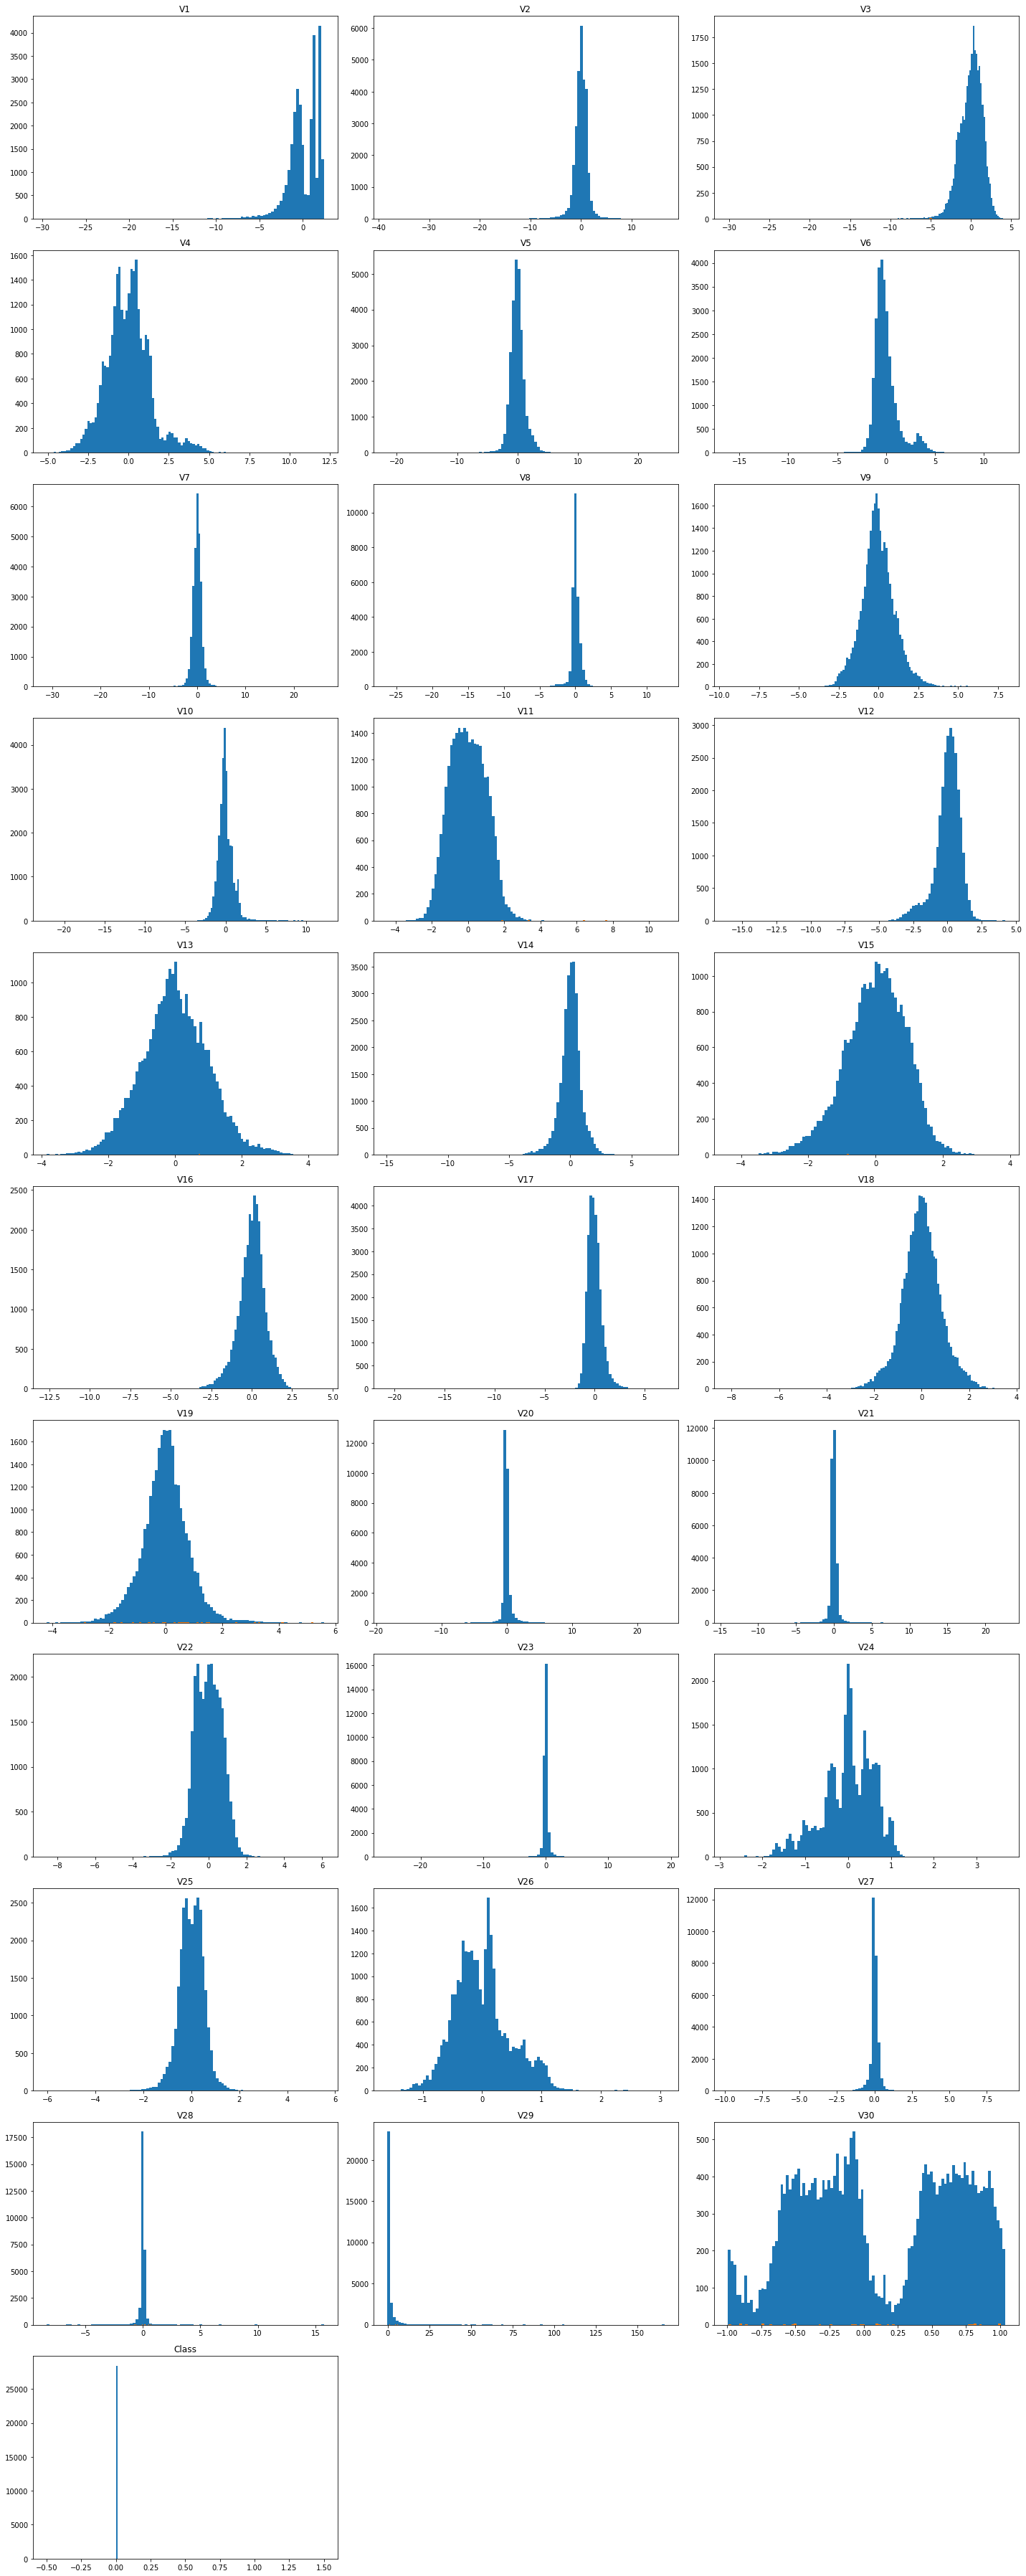

In [ ]:
plt.figure(figsize=(20,50))
i=1
for feature in normal.columns:
    plt.subplot(11,3,i)
    plt.hist(normal[feature], bins = 100)
    plt.hist(fraud[feature],bins = 100)
    plt.title(feature)
    i=i+1
plt.tight_layout()
plt.show()

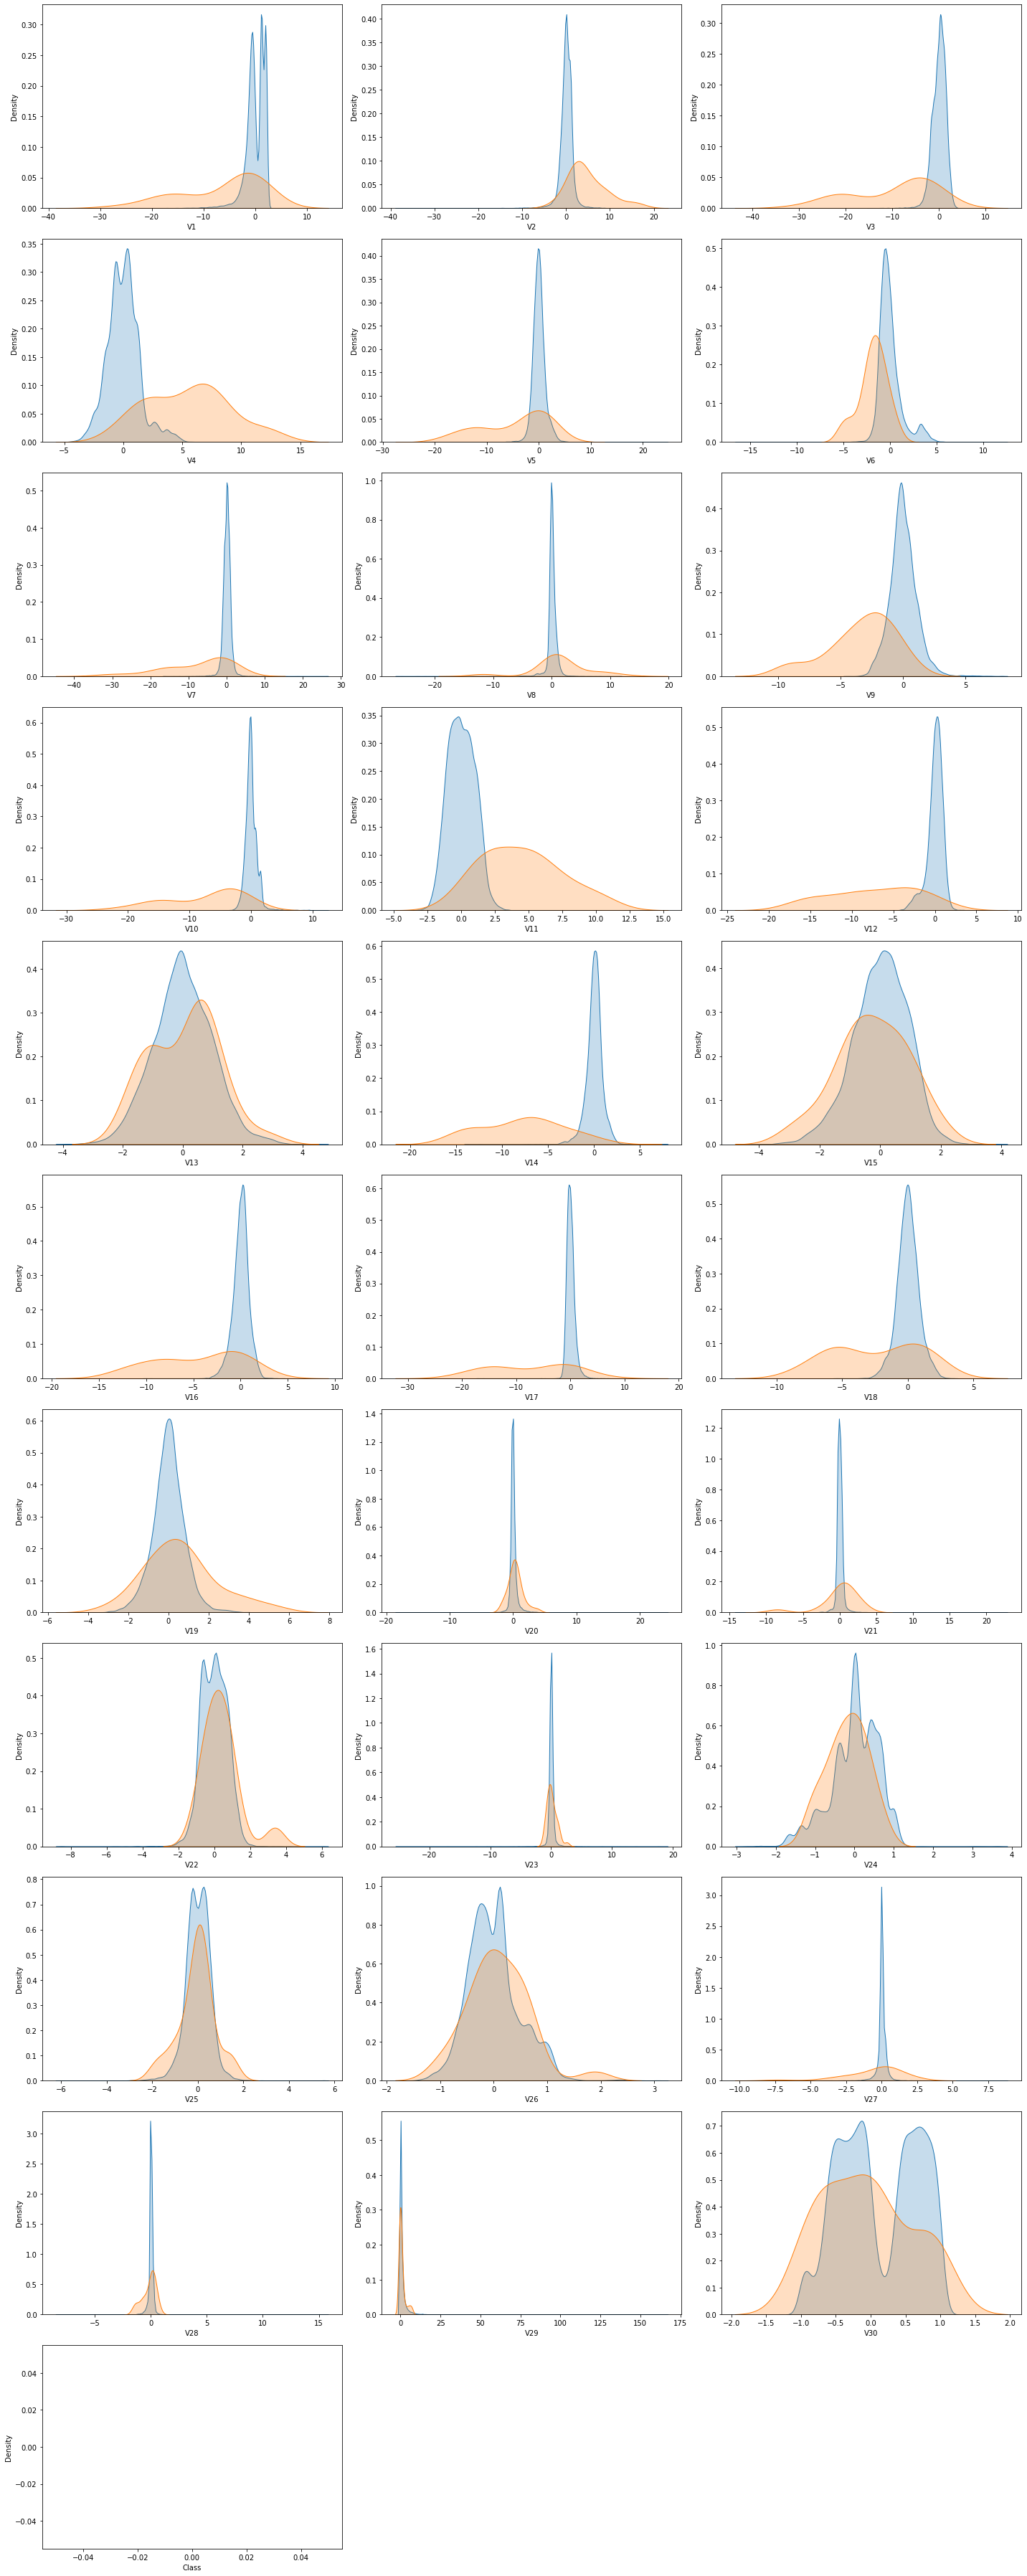

In [ ]:
plt.figure(figsize=(20,50))
i=1
for feature in normal.columns:
    plt.subplot(11,3,i)
    sns.kdeplot(normal[feature], shade= True)
    sns.kdeplot(fraud[feature], shade= True)
    i=i+1
    plt.tight_layout()
plt.show()

> hist 분석결과
* 심각한 클래스 불균형
* 이상치는 정상치 데이터와 섞여 있으므로 각 특징들 하나씩 살펴보고 모델에 적합하기에 적절한지 확인

> kdeplot 분석결과
* 이상치는 낮은 차원의 부분 공간에 숨어 있어 탐지하기 어려움
* 따라서 특징의 커널 밀도를 살펴봄으로써 이상치탐지에 도움이 되는 특징을 선택할수 있음

In [ ]:
# 의미 있는 특징만 선택하기
# columns = [1,2,3,4,5,7,9,10,11,12,14,16,17,18,29] -> 참고 데이터는 첫번째열이 time임
columns = ['V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18','V29'] # 우리데이터에 맞는 순서임

# 스케일링
* MinMaxScaler() 로 진행
* 참고 코드는 정상치 데이터만를 일부 샘플링하여 학습함

In [ ]:
'''
# 참고 코드
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

#scale between (0,1)
Data_norm = MinMaxScaler().fit_transform(Data.iloc[:,:-1])
Data_norm = pd.DataFrame(Data_norm)
Data_norm['Class'] = Data['Class']
normal = Data_norm.loc[Data_norm['Class'] == 0, :]
fraud = Data_norm.loc[Data_norm['Class'] == 1, :]
'''

In [ ]:
## 스케일링 함수
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

def train_df_scaler(df) :
  df_columns = df.columns
  scaler = MinMaxScaler()
  scaler.fit_transform(df)
  result_df = pd.DataFrame(scaler.transform(df), columns = df_columns)
  return result_df

def vaild_df_scaler(df, label : str) :
  class_df = df[[f'{label}']]
  df = df.drop(columns=['Class'])
  df_columns = df.columns
  scaler = MinMaxScaler()
  scaler.fit_transform(df)
  result_df = pd.DataFrame(scaler.transform(df), columns = df_columns)
  result_df = pd.concat([result_df, class_df], axis = 1)
  return result_df

In [ ]:
train_data = train_df.drop(columns=['ID'])
train_data = train_df_scaler(train_data)

In [ ]:
valid_data = val_df.drop(columns=['ID'])
valid_data = vaild_df_scaler(valid_data, 'Class')

In [ ]:
test_data = test_df.drop(columns=['ID'])
test_data = train_df_scaler(test_data)

In [ ]:
'''
참고 코드
Data = Data_norm.sample(frac = .2, random_state = 42) 144330 -> 28927 # 0.2정도만 추출
X = Data.loc[:,columns]
y = Data['Class']
print(X.shape)
print(y.shape)
'''

In [ ]:
train_X = train_data.loc[:, columns]
print(train_X.shape)

vaild_X = valid_data.loc[:, columns]
vaild_y = valid_data['Class']
print(vaild_X.shape, vaild_y.shape)

test_X = test_data.loc[:, columns]
print(test_X.shape)

(113842, 15)
(28462, 15) (28462,)
(142503, 15)


# modeling

In [ ]:
classifiers = {
    "ISOLATION FOREST":IsolationForest(n_estimators=155,
                                       max_samples=len(train_X),
                                       contamination=.00194,
                                       random_state=42,
                                       verbose=0),
    "LOCAL OUTLIER FACTOR":LocalOutlierFactor(n_neighbors=200,
                                              algorithm='auto',
                                              leaf_size=230,
                                              metric='euclidean',
                                              p=1,
                                              metric_params=None,
                                              contamination=.0021),
    "ONE CLASS SVM":OneClassSVM(kernel='rbf',
                                degree=3,
                                gamma = 'auto',
                                nu=0.00215,
                                max_iter=-1)
}

In [ ]:
#### 결과치 txt 파일로 저장
from datetime import date
import sys
today = date.today().isoformat()
f = open(f'{directory}/experiment_results/Anomaly Detection with Unsupervised Learning_result_{today}.txt', 'w')

for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "LOCAL OUTLIER FACTOR": # LOF는 이상치 검출 사용시 예측할수 없음?
        clf.fit(train_X)
        y_pred = clf.fit_predict(vaild_X)
        scores_prediction = clf.negative_outlier_factor_

    elif clf_name == "ONE CLASS SVM":
        clf.fit(train_X)
        y_pred = clf.predict(vaild_X)

    else: #IsolationForest
        clf.fit(train_X)
        scores_prediction = clf.decision_function(train_X)
        y_pred = clf.predict(vaild_X)

    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != vaild_y).sum()

    # Run Classification Metrics
    print("="*50, file=f)
    print("{} number of errors: {}".format(clf_name,n_errors), file=f)
    print('\n', file=f)

    print('===== conditions ====', file=f)
    print(classifiers[f'{clf_name}'], file=f)
    print('\n', file=f)

    print('=====  crosstab  =====', file=f)
    print(pd.crosstab(vaild_y, y_pred), file=f)
    print('\n', file=f)

    print('=====  result  =====', file=f)
    print('silhouette coefficient:',round(metrics.silhouette_score(valid_data, y_pred, metric='euclidean'), 3), file=f)
    print('Adjusted Rand index   :',round(metrics.adjusted_rand_score(vaild_y, y_pred),3), file=f)
    print("Classification Report :", file=f)
    print(classification_report(vaild_y,y_pred), file=f)
    print('\n', file=f)

f.close()

ISOLATION FOREST number of errors: 320


===== conditions ====
IsolationForest(contamination=0.00194, max_samples=113842, n_estimators=155,
                random_state=42)


=====  crosstab  =====
col_0      0    1
Class            
0      28121  311
1          9   21


=====  result  =====
silhouette coefficient: 0.382
Adjusted Rand index   : 0.113
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28432
           1       0.06      0.70      0.12        30

    accuracy                           0.99     28462
   macro avg       0.53      0.84      0.56     28462
weighted avg       1.00      0.99      0.99     28462



LOCAL OUTLIER FACTOR number of errors: 42


===== conditions ====
LocalOutlierFactor(contamination=0.0021, leaf_size=230, metric='euclidean',
                   n_neighbors=200, p=1)


=====  crosstab  =====
col_0      0   1
Class           
0      28396  36
1          6  24


=====  result  =

In [ ]:
## 제출물 만들기
from datetime import date
today = date.today().isoformat()
submit = pd.read_csv(f'{directory}/data/sample_submission.csv')
name = 'sh'

for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "LOCAL OUTLIER FACTOR": # LOF는 이상치 검출 사용시 예측할수 없음?
        clf.fit(train_X)
        y_pred = clf.fit_predict(test_X)
        #scores_prediction = clf.negative_outlier_factor_

    elif clf_name == "ONE CLASS SVM":
        clf.fit(train_X)
        y_pred = clf.predict(test_X)

    else: #IsolationForest
        clf.fit(train_X)
        #scores_prediction = clf.decision_function(train_X)
        y_pred = clf.predict(test_X)

    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    submit['Class'] = y_pred
    submit.to_csv(f'{directory}/submit/ADUL_{clf_name}_{today}_by_{name}.csv', index=False) # 베이스라인 리더보드 : 0.68613

In [ ]:
len(y_pred)

142503

In [ ]:
name = 'sh'
summit_result = pd.read_excel(f'{directory}/experiment_results/submit.xlsx')

for i, (clf_name,clf) in enumerate(classifiers.items()):
  file_name = f'ADUL_{clf_name}_{today}_by_{name}.csv'
  condition = classifiers[f'{clf_name}']
  summit_result = summit_result.append({'condition' : condition, 'csv_name' : file_name}, ignore_index=True)

summit_result.to_excel(f'{directory}/experiment_results/submit.xlsx', index = False)